In [30]:
#!pip install git+https://github.com/JoaquinAmatRodrigo/skforecast#master --upgrade
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/ximo/Documents/GitHub/skforecast')
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Autoregressive forecaster

In [66]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

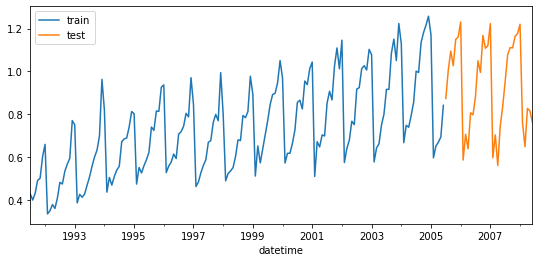

In [67]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [71]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:21:27 
Last fit date: 2021-12-08 18:21:27 
Skforecast version: 0.4.0 

In [72]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(3)

2005-07-01    0.921840
2005-08-01    0.954921
2005-09-01    1.101716
Freq: MS, Name: pred, dtype: float64

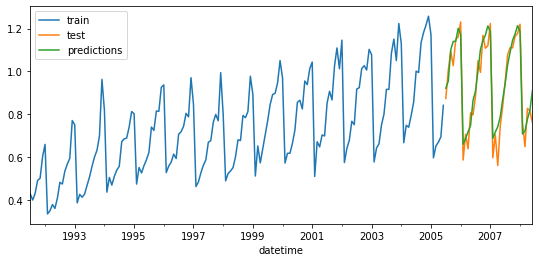

In [73]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [74]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.00429855684785846


In [75]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature   |   importance |
|-----------|--------------|
| lag_1     |   0.0123397  |
| lag_2     |   0.0851603  |
| lag_3     |   0.0134071  |
| lag_4     |   0.00437446 |
| lag_5     |   0.00318805 |
| lag_6     |   0.00343593 |
| lag_7     |   0.00313612 |
| lag_8     |   0.00714094 |
| lag_9     |   0.00783053 |
| lag_10    |   0.0127507  |
| lag_11    |   0.00901919 |
| lag_12    |   0.807098   |
| lag_13    |   0.00481128 |
| lag_14    |   0.0163282  |
| lag_15    |   0.0099792  |


# Autoregressive forecaster with exogenous predictor

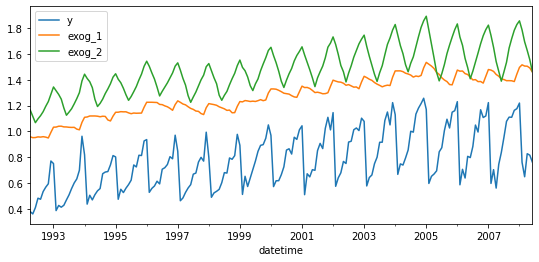

In [77]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',', header=0, names=['datetime', 'y', 'exog_1', 'exog_2'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data.sort_index()

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data.plot(ax=ax);

In [79]:
# Split train-test
# ==============================================================================
steps = 36
data_train = data.iloc[:-steps, :]
data_test  = data.iloc[-steps:, :]

In [80]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15
             )

forecaster.fit(
    y    = data_train['y'],
    exog = data_train[['exog_1', 'exog_2']]
)

forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['exog_1', 'exog_2'] 
Training range: [Timestamp('1992-04-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:26:10 
Last fit date: 2021-12-08 18:26:10 
Skforecast version: 0.4.0 

In [82]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36, exog=data_test[['exog_1', 'exog_2']])
predictions.head(3)

2005-07-01    0.908832
2005-08-01    0.953925
2005-09-01    1.100887
Freq: MS, Name: pred, dtype: float64

In [83]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature   |   importance |
|-----------|--------------|
| lag_1     |   0.0133541  |
| lag_2     |   0.0611202  |
| lag_3     |   0.00908617 |
| lag_4     |   0.00272094 |
| lag_5     |   0.00247847 |
| lag_6     |   0.00315493 |
| lag_7     |   0.00217887 |
| lag_8     |   0.00815443 |
| lag_9     |   0.0103189  |
| lag_10    |   0.0205869  |
| lag_11    |   0.00703555 |
| lag_12    |   0.773389   |
| lag_13    |   0.00458297 |
| lag_14    |   0.0181272  |
| lag_15    |   0.00873237 |
| exog_1    |   0.0103638  |
| exog_2    |   0.0446156  |


# Autoregressive forecaster with custom predictors

In [85]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [89]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

In [90]:
def create_predictors(y):
    '''
    Create first 10 lags of a time series.
    Calculate moving average with window 20.
    '''
    
    X_train = pd.DataFrame({'y':y.copy()})
    for i in range(0, 10):
        X_train[f'lag_{i+1}'] = X_train['y'].shift(i)
        
    X_train['moving_avg'] = X_train['y'].rolling(20).mean()
    
    X_train = X_train.drop(columns='y').tail(1).to_numpy()  
    
    return X_train 

In [91]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregCustom(
                    regressor      = RandomForestRegressor(random_state=123),
                    fun_predictors = create_predictors,
                    window_size    = 20
                )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoregCustom 
Regressor: RandomForestRegressor(random_state=123) 
Predictors created with function: create_predictors 
Window size: 20 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2021-12-08 18:37:36 
Last fit date: 2021-12-08 18:37:37 
Skforecast version: 0.4.0 

In [92]:
# Predict
# ==============================================================================
predictions = forecaster.predict(steps=36)
predictions.head(3)

2005-07-01    0.926598
2005-08-01    0.948202
2005-09-01    1.020947
Freq: MS, Name: pred, dtype: float64

In [93]:
# Feature importance
# ==============================================================================
forecaster.get_feature_importance()

print(forecaster.get_feature_importance().to_markdown(index=False, tablefmt='github'))

| feature             |   importance |
|---------------------|--------------|
| custom_predictor_0  |    0.53972   |
| custom_predictor_1  |    0.119097  |
| custom_predictor_2  |    0.0464036 |
| custom_predictor_3  |    0.0241653 |
| custom_predictor_4  |    0.0305667 |
| custom_predictor_5  |    0.0151391 |
| custom_predictor_6  |    0.0428832 |
| custom_predictor_7  |    0.012742  |
| custom_predictor_8  |    0.018938  |
| custom_predictor_9  |    0.108639  |
| custom_predictor_10 |    0.0417066 |


## Prediction intervals

In [7]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [15]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

In [12]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Ridge()),
                    lags      = 15
                )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2021-12-08 20:15:44 
Last fit date: 2021-12-08 20:15:44 
Skforecast version: 0.4.0 

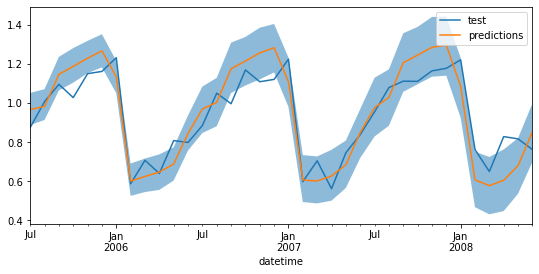

In [16]:
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = steps,
                    interval = [5, 95],
                    n_boot   = 500
              )


fig, ax=plt.subplots(figsize=(9, 4))
data_test.plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    alpha=0.5
)
ax.legend();

# Backtesting

In [17]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

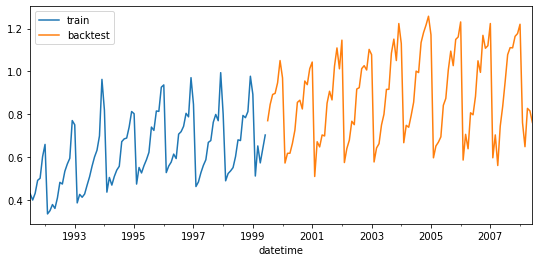

In [18]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-backtest
# ==============================================================================
n_backtest = 36*3  # Last 9 years are used for backtest
data_train = data[:-n_backtest]
data_backtest = data[-n_backtest:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_backtest.plot(ax=ax, label='backtest')
ax.legend();

In [20]:
# Backtest forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 15 
             )

metric, predictions_backtest = backtesting_forecaster(
                                    forecaster = forecaster,
                                    y          = data,
                                    initial_train_size = len(data_train),
                                    steps      = 12,
                                    metric     = 'mean_squared_error',
                                    refit      = True,
                                    verbose    = True
                               )

Information of backtesting process
----------------------------------
Number of observations used for initial training: 96
Number of observations used for backtesting: 108
    Number of folds: 9
    Number of steps per fold: 12

Data partition in fold: 0
    Training:   1991-07-01 00:00:00 -- 1999-06-01 00:00:00
    Validation: 1999-07-01 00:00:00 -- 2000-06-01 00:00:00
Data partition in fold: 1
    Training:   1991-07-01 00:00:00 -- 2000-06-01 00:00:00
    Validation: 2000-07-01 00:00:00 -- 2001-06-01 00:00:00
Data partition in fold: 2
    Training:   1991-07-01 00:00:00 -- 2001-06-01 00:00:00
    Validation: 2001-07-01 00:00:00 -- 2002-06-01 00:00:00
Data partition in fold: 3
    Training:   1991-07-01 00:00:00 -- 2002-06-01 00:00:00
    Validation: 2002-07-01 00:00:00 -- 2003-06-01 00:00:00
Data partition in fold: 4
    Training:   1991-07-01 00:00:00 -- 2003-06-01 00:00:00
    Validation: 2003-07-01 00:00:00 -- 2004-06-01 00:00:00
Data partition in fold: 5
    Training:   1991-07-0

## GridSearch

In [23]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from sklearn.ensemble import RandomForestRegressor

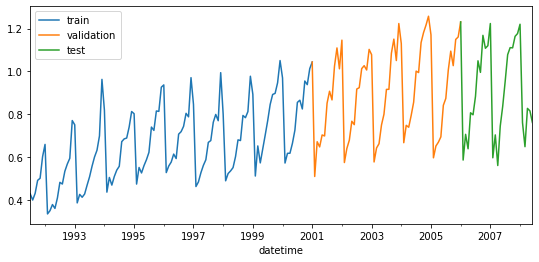

In [24]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 24
data_train = data.loc[: '2001-01-01']
data_val = data.loc['2001-01-01' : '2006-01-01']
data_test  = data.loc['2006-01-01':]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_val.plot(ax=ax, label='validation')
data_test.plot(ax=ax, label='test')
ax.legend();

In [25]:
# Grid search hyperparameters and lags
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # Placeholder, the value will be overwritten
             )

# Regressor hiperparameters
param_grid = {'n_estimators': [50, 100],
              'max_depth': [5, 10, 15]}

# Lags used as predictors
lags_grid = [3, 10, [1, 2, 3, 20]]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = data.loc[:'2006-01-01'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 12,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = len(data_train),
                        return_best = True,
                        verbose     = False
                    )

Number of models compared: 18


loop lags_grid: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.90s/it]

Refitting `forecaster` using the best found parameters and the whole data set: 
  lags: [ 1  2  3  4  5  6  7  8  9 10] 
  params: {'max_depth': 5, 'n_estimators': 50}



In [26]:
print(results_grid.to_markdown(index=False, tablefmt='github'))

| lags                            | params                                 |    metric |   max_depth |   n_estimators |
|---------------------------------|----------------------------------------|-----------|-------------|----------------|
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 5, 'n_estimators': 50}   | 0.0334486 |           5 |             50 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 10, 'n_estimators': 50}  | 0.0392212 |          10 |             50 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 15, 'n_estimators': 100} | 0.0392658 |          15 |            100 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 5, 'n_estimators': 100}  | 0.0395258 |           5 |            100 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 10, 'n_estimators': 100} | 0.0402408 |          10 |            100 |
| [ 1  2  3  4  5  6  7  8  9 10] | {'max_depth': 15, 'n_estimators': 50}  | 0.0407645 |          15 |             50 |
| [ 1  2  3 20]                   | {'ma